In [2]:
import sys
# Make imports work
sys.path.insert(0, '../')

In [3]:
import importlib
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from p_tqdm import p_map

from mhealth_anomaly_detection import plots
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import datasets
from mhealth_anomaly_detection import load_refs as lr

/Users/sakre/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
importlib.reload(datasets)
year=4
dataset = datasets.GLOBEM(
    data_path='~/Data/mHealth_external_datasets/GLOBEM',
    year=year,
    sensor_data_types=['sleep', 'steps', 'location', 'call'],
)
data = dataset.data
data

/Users/sakre/Code/dgc/mhealth_anomaly_detection/notebooks/../mhealth_anomaly_detection/datasets.py:214: DtypeWarning: Columns (413,414,415,416,417,418,419,420,421,422,423,424,425,426,905,906,907,908,909,910,911,912,913,914,915,916,917,918,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(sensor_data_path, index_col=0)
/Users/sakre/Code/dgc/mhealth_anomaly_detection/notebooks/../mhealth_anomaly_detection/datasets.py:214: DtypeWarning: Columns (565) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(sensor_data_path, index_col=0)


Filtering only daily features. Going from 3402 to 1890 features


MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [4]:
plot_features = [
'phq4',
'f_loc:phone_locations_doryab_locationentropy:allday',
'f_loc:phone_locations_barnett_circdnrtn:allday',
'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday',
'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
'f_call:phone_calls_rapids_missed_count:allday',
'f_call:phone_calls_rapids_incoming_count:allday',
'f_call:phone_calls_rapids_outgoing_count:allday',
'f_call:phone_calls_rapids_outgoing_sumduration:allday',
]
fig_dir = Path('..', 'output', f'GLOBEM_year-{year}', 'lineplot')
fig_dir.mkdir(
    parents=True,
    exist_ok=True
)
palette = lr.get_colors('../lib/colors.json')

In [5]:
data.melt(
    id_vars=dataset.id_cols,
    value_vars=plot_features,
    var_name='feature',
    value_name='value'
)

,subject_id,platform,date,study_day,feature,value
0,INS-W_600,ios,2020-03-16,0,phq4,NaN
1,INS-W_600,ios,2020-03-17,1,phq4,NaN
2,INS-W_600,ios,2020-03-18,2,phq4,NaN
3,INS-W_600,ios,2020-03-19,3,phq4,NaN
4,INS-W_600,ios,2020-03-20,4,phq4,NaN
...,...,...,...,...,...,...
184725,INS-W_761,ios,2020-06-22,98,f_call:phone_calls_rapids_outgoing_sumduration...,NaN
184726,INS-W_761,ios,2020-06-23,99,f_call:phone_calls_rapids_outgoing_sumduration...,NaN
184727,INS-W_761,ios,2020-06-24,100,f_call:phone_calls_rapids_outgoing_sumduration...,NaN
184728,INS-W_761,ios,2020-06-25,101,f_call:phone_calls_rapids_outgoing_sumduration...,NaN


In [6]:

passive_feature_rep = [
'f_loc:phone_locations_doryab_locationentropy:allday',
'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
'f_call:phone_calls_rapids_outgoing_meanduration:allday',
]

<Axes: xlabel='feature', ylabel='subject_id'>

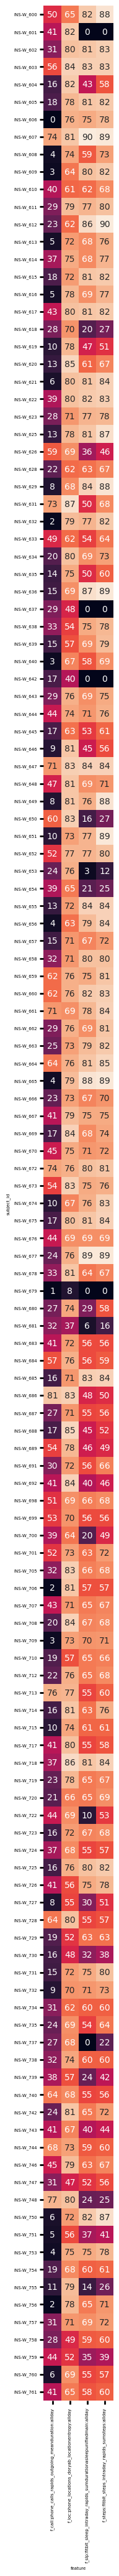

In [7]:
fig, ax = plt.subplots(figsize=(30,50))

sns.heatmap(
    data.melt(
        id_vars=dataset.id_cols,
        value_vars=passive_feature_rep,
        var_name='feature',
        value_name='value'
    ).pivot_table(
        index='subject_id',
        columns='feature',
        aggfunc='count',
        values='value',
        fill_value=0
    ),
    annot=True,
    cbar=False,
    ax=ax,
    square=True,
)
fa.despine_thicken_axes(ax, heatmap=True, fontsize=5, x_rotation=90)

/var/folders/n5/2y22qmm94m583fwzs33kt5chmmbr8_/T/ipykernel_25377/3606728957.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_types_time = data.melt(


<Axes: xlabel='subject_id', ylabel='study_day'>

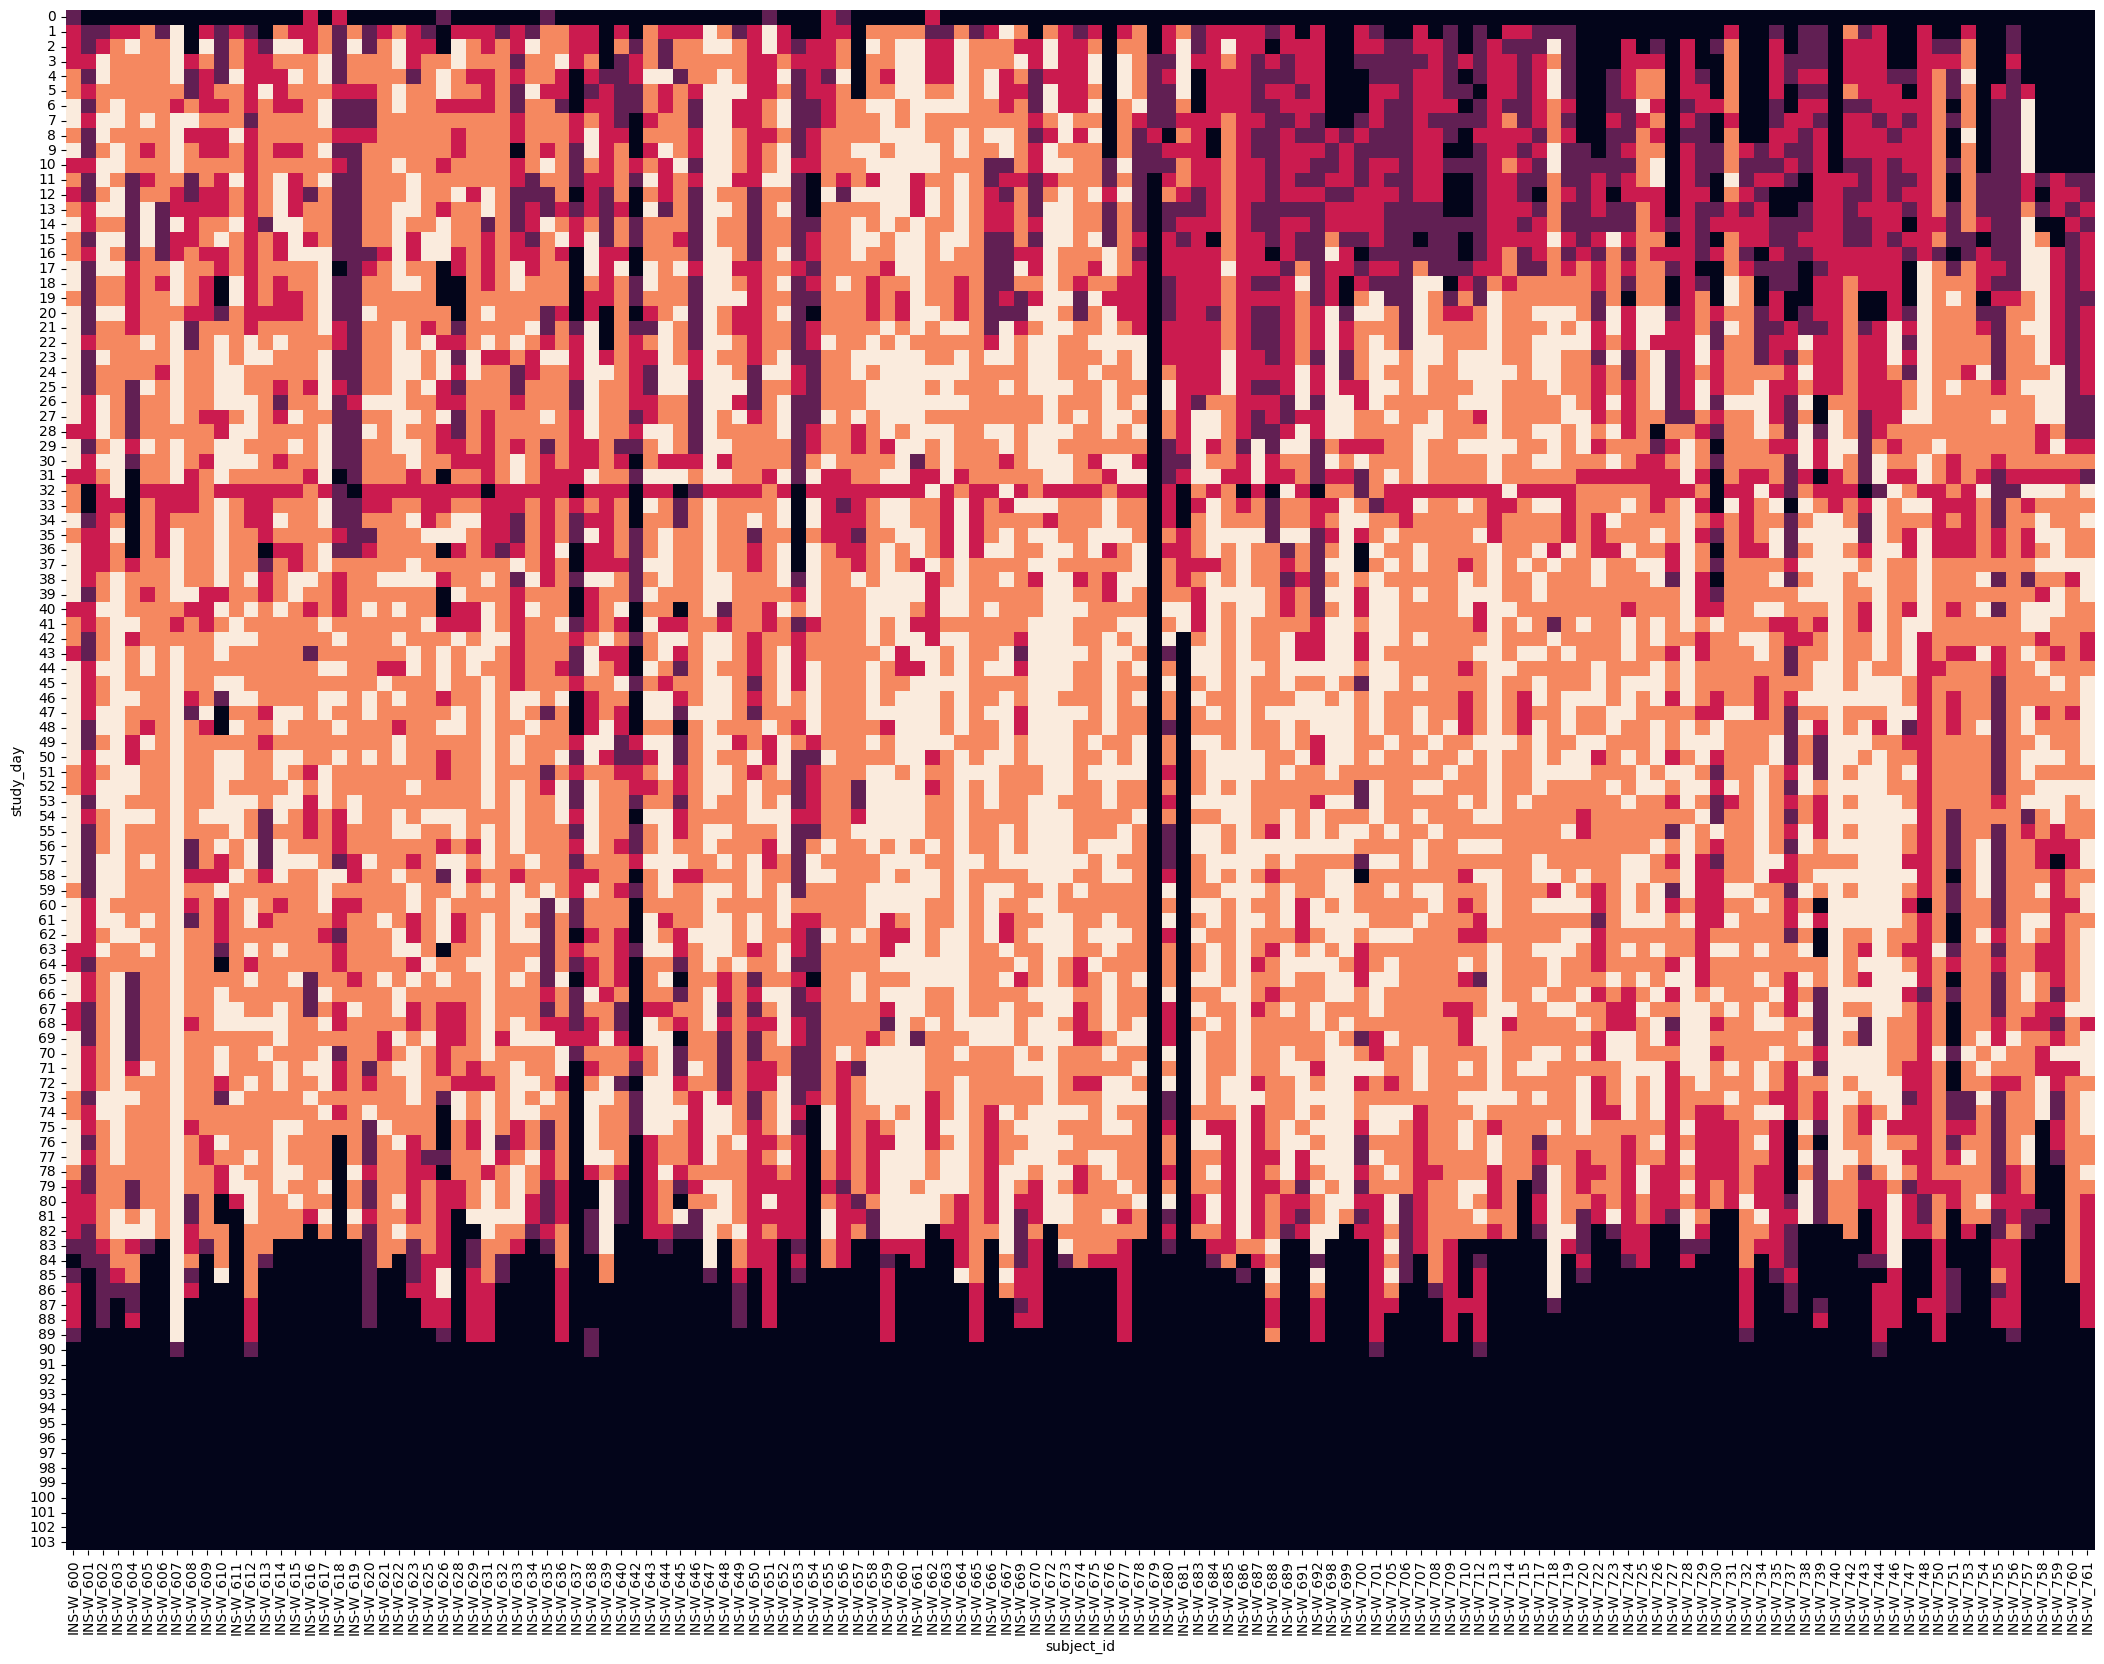

In [8]:
data_types_time = data.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['study_day', 'feature'],
    columns='subject_id',
    aggfunc='count',
    values='value',
    fill_value=0
).reset_index().groupby(['study_day']).sum()

fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(
    data_types_time,
    square=True,
    ax=ax,
    cbar=False
)

In [9]:
data_types_time.sum().sort_values().head(n=27)

subject_id
INS-W_679      9
INS-W_642     57
INS-W_637     77
INS-W_681     91
INS-W_653    115
INS-W_737    117
INS-W_601    123
INS-W_755    130
INS-W_730    134
INS-W_751    139
INS-W_727    144
INS-W_618    145
INS-W_654    150
INS-W_739    161
INS-W_759    170
INS-W_700    172
INS-W_722    176
INS-W_650    186
INS-W_747    186
INS-W_619    186
INS-W_760    187
INS-W_680    188
INS-W_646    191
INS-W_743    192
INS-W_645    194
INS-W_758    196
INS-W_640    197
dtype: int64

subject_id
INS-W_653     0
INS-W_737     0
INS-W_637     0
INS-W_606     0
INS-W_679     0
             ..
INS-W_660    61
INS-W_661    64
INS-W_647    70
INS-W_672    73
INS-W_607    74
Length: 137, dtype: int64

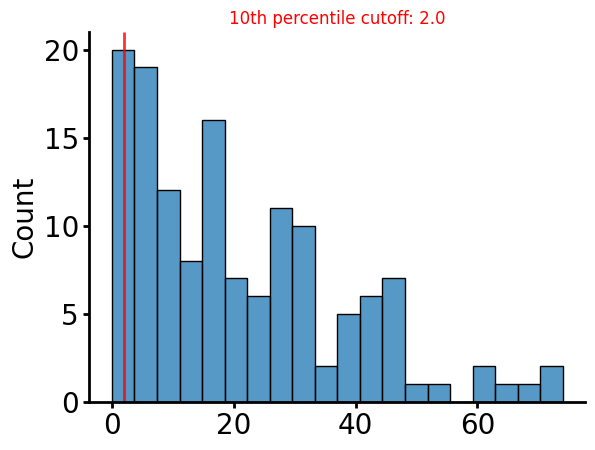

In [10]:
days_with_all_data = (data_types_time == 4).sum()
ax = sns.histplot(days_with_all_data,bins=20)
cutoff = days_with_all_data.quantile(.10)
keep_participants_passive = list(days_with_all_data[days_with_all_data >= cutoff].index)
ylim = ax.get_ylim()
ax.vlines([cutoff], *ylim, color='red', lw=2, alpha=.8)
ax.set_ylim(ylim)
ax.set_title(f'10th percentile cutoff: {cutoff}', color='red')
fa.despine_thicken_axes(ax)
days_with_all_data.sort_values()

count    137.000000
mean       9.649635
std        1.442991
min        1.000000
25%        9.000000
50%       10.000000
75%       11.000000
max       11.000000
Name: phq4, dtype: float64

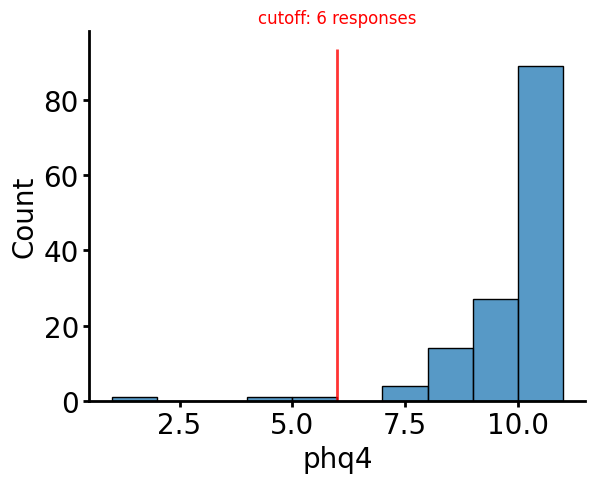

In [11]:
phq_avail = data.groupby(['subject_id']).phq4.count()
ax = sns.histplot(phq_avail, bins=10)
phq_cutoff = 6
keep_participants_active = list(phq_avail[phq_avail >= phq_cutoff].index)
ylim = ax.get_ylim()
ax.vlines([phq_cutoff], *ylim, color='red', lw=2, alpha=.8)
ax.set_title(f'cutoff: {phq_cutoff} responses', color='red')
fa.despine_thicken_axes(ax)
days_with_all_data.sort_values()
phq_avail.describe()

In [16]:
keep_participants = [s for s in keep_participants_passive if s in keep_participants_active]
for p in data.subject_id.unique():
    if p not in keep_participants:
        print(f'"{p}",')
len(keep_participants), data.subject_id.nunique()

"INS-W_601",
"INS-W_606",
"INS-W_637",
"INS-W_642",
"INS-W_653",
"INS-W_679",
"INS-W_681",
"INS-W_737",
"INS-W_756",


(128, 137)

In [14]:
feat_time = data.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['subject_id'],
    columns=['feature','study_day'],
    aggfunc='count',
    values='value',
    fill_value=0
)
feat_time

feature    f_call:phone_calls_rapids_outgoing_meanduration:allday              \
study_day                                                     0   1   2   3     
subject_id                                                                      
INS-W_600                                                   0       0   0   0   
INS-W_601                                                   0       0   0   1   
INS-W_602                                                   0       0   0   1   
INS-W_603                                                   0       0   0   0   
INS-W_604                                                   0       0   1   0   
...                                                       ...      ..  ..  ..   
INS-W_757                                                   0       0   0   0   
INS-W_758                                                   0       0   0   0   
INS-W_759                                                   0       0   0   0   
INS-W_760                                                   0       0   0   0   
INS-W_761                                                   0       0   0   0   

feature                             ...  \
study_day  4   5   6   7   8   9    ...   
subject_id                          ...   
INS-W_600    0   0   1   1   0   1  ...   
INS-W_601    0   1   0   1   0   0  ...   
INS-W_602    1   0   0   1   1   0  ...   
INS-W_603    0   0   1   1   0   1  ...   
INS-W_604    0   0   0   0   0   0  ...   
...         ..  ..  ..  ..  ..  ..  ...   
INS-W_757    0   0   1   1   1   1  ...   
INS-W_758    0   0   0   0   0   0  ...   
INS-W_759    0   0   0   0   0   0  ...   
INS-W_760    0   0   0   0   0   0  ...   
INS-W_761    0   0   0   0   0   0  ...   

feature    f_steps:fitbit_steps_intraday_rapids_sumsteps:allday              \
study_day                                                   94  95  96  97    
subject_id                                                                    
INS-W_600                                                   0     0   0   0   
INS-W_601                                                   0     0   0   0   
INS-W_602                                                   0     0   0   0   
INS-W_603                                                   0     0   0   0   
INS-W_604                                                   0     0   0   0   
...                                                       ...    ..  ..  ..   
INS-W_757                                                   0     0   0   0   
INS-W_758                                                   0     0   0   0   
INS-W_759                                                   0     0   0   0   
INS-W_760                                                   0     0   0   0   
INS-W_761                                                   0     0   0   0   

feature                             
study_day  98  99  100 101 102 103  
subject_id                          
INS-W_600    0   0   0   0   0   0  
INS-W_601    0   0   0   0   0   0  
INS-W_602    0   0   0   0   0   0  
INS-W_603    0   0   0   0   0   0  
INS-W_604    0   0   0   0   0   0  
...         ..  ..  ..  ..  ..  ..  
INS-W_757    0   0   0   0   0   0  
INS-W_758    0   0   0   0   0   0  
INS-W_759    0   0   0   0   0   0  
INS-W_760    0   0   0   0   0   0  
INS-W_761    0   0   0   0   0   0  

[137 rows x 416 columns]

<Axes: xlabel='subject_id', ylabel='feature-study_day'>

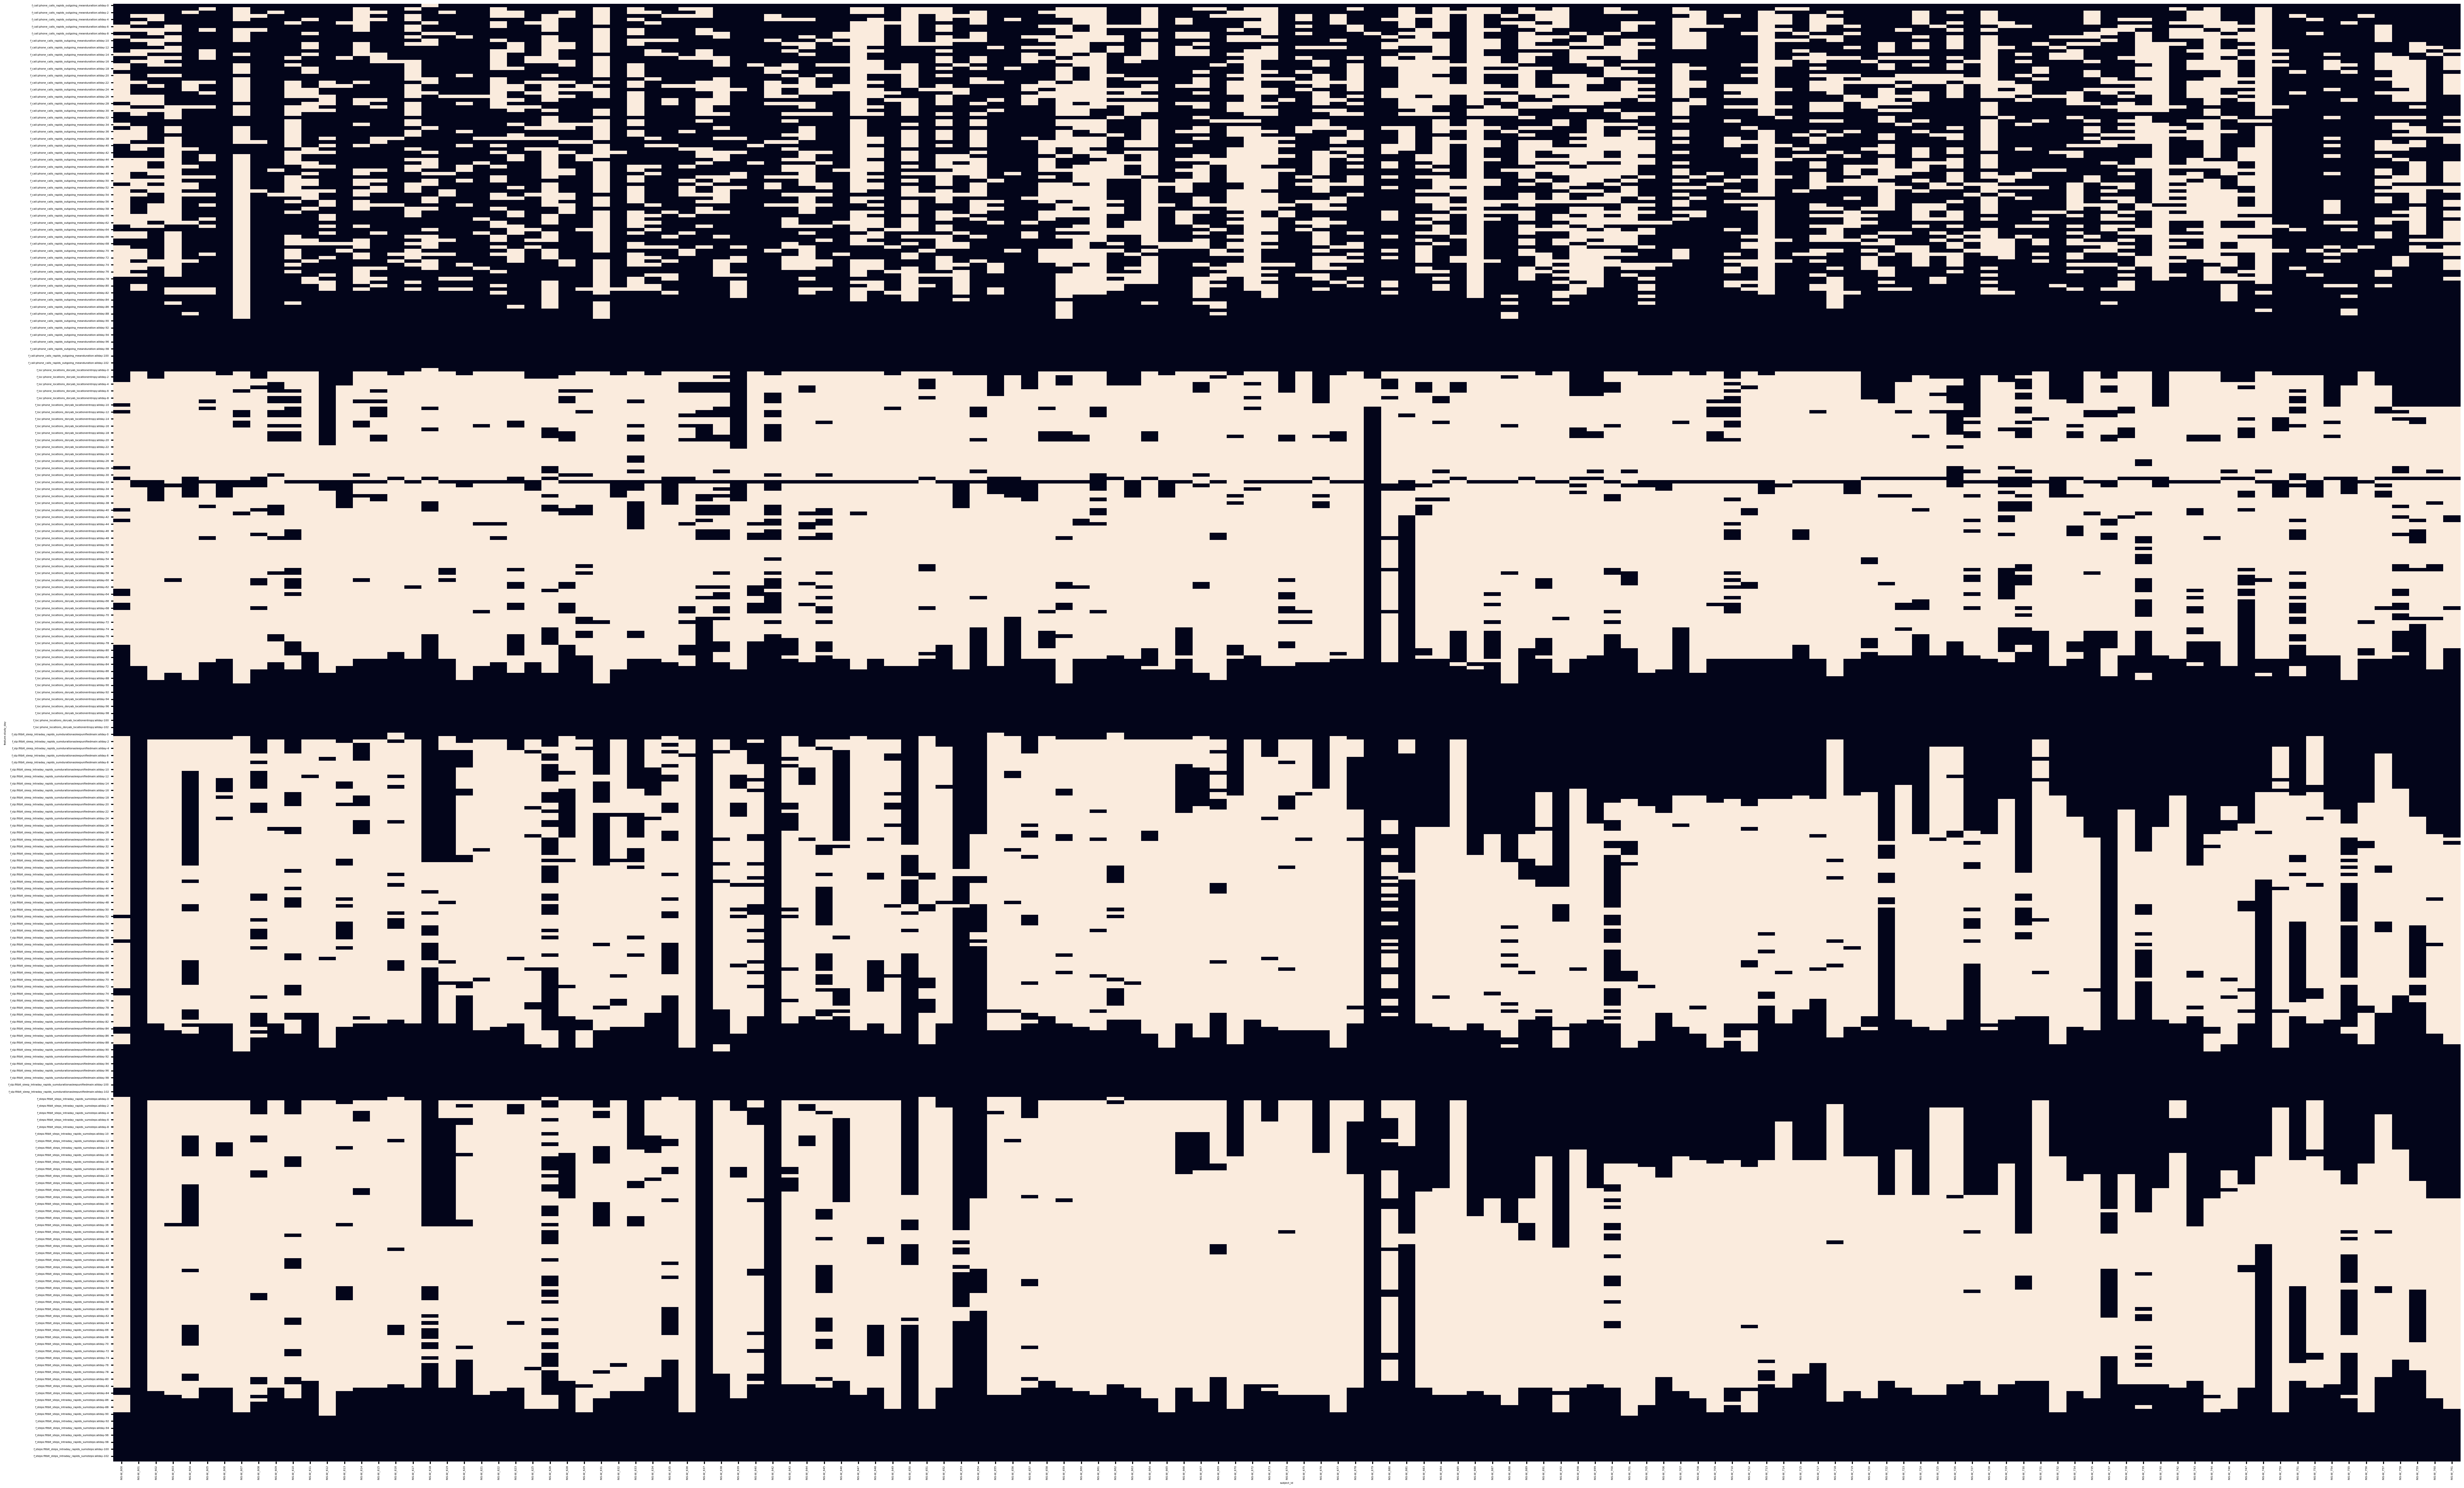

In [15]:
fig, ax = plt.subplots(figsize=(80,50))
sns.heatmap(
    feat_time.T,
    ax=ax,
    cbar=False
)

fa.despine_thicken_axes(ax, heatmap=True, fontsize=5, x_rotation=90)

In [113]:
for (sid, platform), subject_data in tqdm(data.groupby(['subject_id', 'platform'])):
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid} - {platform}')
    fname = Path(fig_dir, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()

  0%|          | 0/192 [00:00<?, ?it/s]


NameError: name 'keep_participants' is not defined

In [14]:
for f in plot_features:
    if f.startswith('phq'):
        print(
            '"' + f + '": "#004488",',
        )
    elif f.startswith('f_steps'):
        print(
            '"' + f + '": "#228833",',
        )
    elif f.startswith('f_slp'):
        print(
            '"' + f + '": "#AA3377",',
        )
    elif f.startswith('f_call'):
        print(
            '"' + f + '": "#44AA99",',
        )
    elif f.startswith('f_loc'):
        print(
            '"' + f + '": "#555555",',
        )
    else:
        print(
            '"' + f + '": "gray",',
        )

"phq4": "#004488",
"f_loc:phone_locations_doryab_locationentropy:allday": "#555555",
"f_loc:phone_locations_barnett_circdnrtn:allday": "#555555",
"f_steps:fitbit_steps_intraday_rapids_sumsteps:allday": "#228833",
"f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday": "#228833",
"f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday": "#AA3377",
"f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday": "#AA3377",
"f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday": "#AA3377",
"f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday": "#AA3377",
"f_call:phone_calls_rapids_missed_count:allday": "#44AA99",
"f_call:phone_calls_rapids_incoming_count:allday": "#44AA99",
"f_call:phone_calls_rapids_outgoing_count:allday": "#44AA99",
"f_call:phone_calls_rapids_outgoing_sumduration:allday": "#44AA99",


## Impute Dataset -- MICE

In [30]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from mhealth_anomaly_detection import impute


features = dataset.sensor_cols
min_days = 7
imputer = IterativeImputer(initial_strategy='median', keep_empty_features=True, skip_complete=True)
imputed = impute.rollingImpute(
    data,
    features,
    min_days,
    imputer,
    num_cpus=6
)
imputed

100%|██████████| 192/192 [00:23<00:00,  8.05it/s]


,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
0,INS-W_300,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INS-W_300,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INS-W_300,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INS-W_300,ios,2019-03-24,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INS-W_300,ios,2019-03-25,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21141,INS-W_572,ios,2019-06-21,92,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN
21142,INS-W_572,ios,2019-06-22,93,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN
21143,INS-W_572,ios,2019-06-23,94,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN
21144,INS-W_572,ios,2019-06-24,95,0.437958,6.132633,0.313332,4.357333,2.153016,433.749239,...,0.0,0.0,0.0,0.874373,0.541958,1034.0,1034.0,103.205998,111.310104,NaN


/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_46117/1990320940.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).reset_index().groupby(['study_day']).sum()


<AxesSubplot: xlabel='subject_id', ylabel='study_day'>

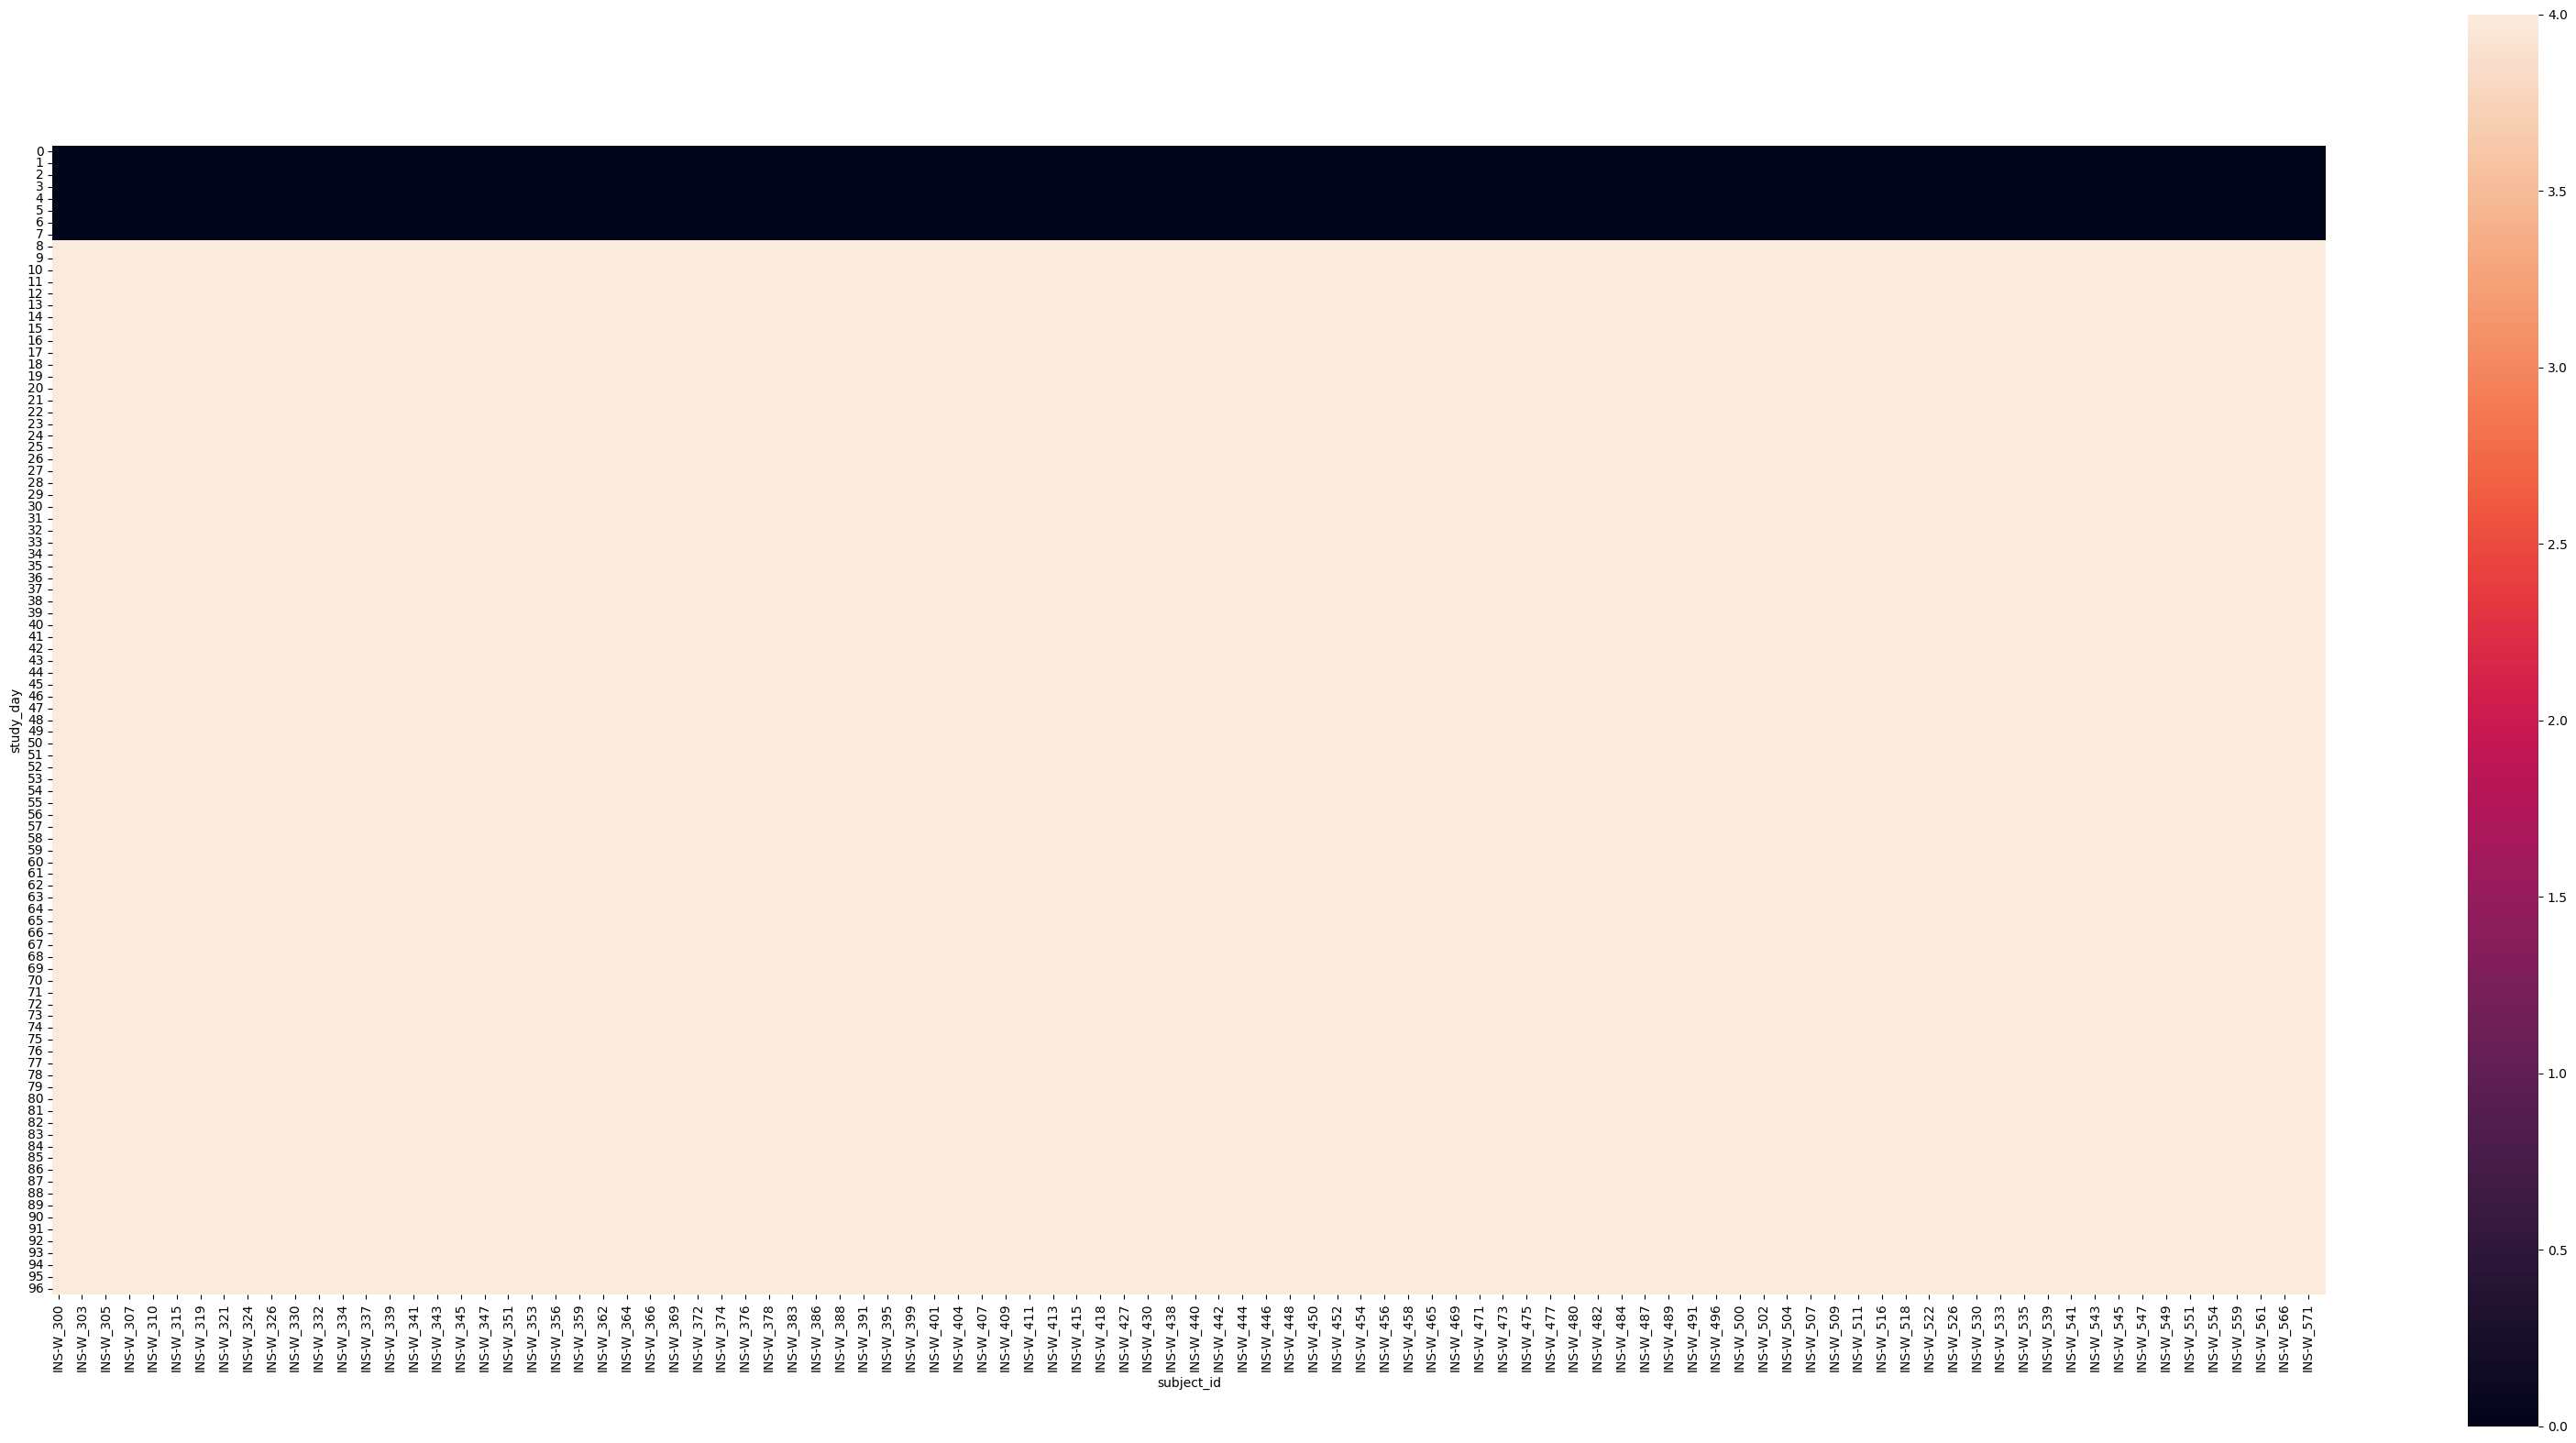

In [31]:
data_types_time = imputed.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['study_day', 'feature'],
    columns='subject_id',
    aggfunc='count',
    values='value',
    fill_value=0
).reset_index().groupby(['study_day']).sum()
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(
    data_types_time,
    square=True,
    ax=ax,
)

In [63]:
subset_plot = [
    'INS-W_347',
    'INS-W_357',
    'INS-W_360',
]

In [65]:
data[data.subject_id.isin([subset_plot[0]])]

,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
3977,INS-W_347,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3978,INS-W_347,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3979,INS-W_347,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3980,INS-W_347,ios,2019-03-24,3,1.170394,8.495867,0.102283,0.742467,0.276786,126.434143,...,NaN,NaN,NaN,NaN,NaN,832.0,1010.0,NaN,13.302882,NaN
3981,INS-W_347,ios,2019-03-25,4,9.637194,89.883350,0.024830,0.231583,34.113907,892.641617,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,547.300649,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,INS-W_347,ios,2019-06-21,92,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4070,INS-W_347,ios,2019-06-22,93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4071,INS-W_347,ios,2019-06-23,94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4072,INS-W_347,ios,2019-06-24,95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
fig_dir_imputed = Path('..', 'output', f'GLOBEM_{year}', 'mice', 'lineplot')
fig_dir_imputed.mkdir(
    parents=True,
    exist_ok=True
)

def plot_figs(input):
    info, subject_data = input
    sid, platform = info
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid} - {platform}')
    fig_dir_imputed = Path('..', 'output', f'GLOBEM_{year}', 'mice', 'lineplot')
    fname = Path(fig_dir_imputed, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()
p_map(
    plot_figs,
    imputed.groupby(['subject_id', 'platform']),
    num_cpus=6
)


100%|██████████| 3/3 [00:01<00:00,  1.98it/s]


[None, None, None]

# Playground

In [159]:
anomalies_detected = pd.read_csv('../cache/GLOBEM-2_exp04_intermediate.csv')
anomalies_detected

/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_46117/2549903410.py:1: DtypeWarning: Columns (362,363,364,365,366,367,368,369,370,371,372,373) have mixed types. Specify dtype option on import or set low_memory=False.
  anomalies_detected = pd.read_csv('../cache/GLOBEM-2_exp04_intermediate.csv')


,subject_id,study_day,window_size,platform,date,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,...,NMF_3_anomaly,SVM_poly_anomaly,PCA_5_anomaly,NMF_5_anomaly,SVM_rbf_anomaly,SVM_sigmoid_anomaly,PCA_10_anomaly,NMF_10_anomaly,PCA_20_anomaly,NMF_20_anomaly
0,INS-W_300,0,7,ios,2019-03-21,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INS-W_300,1,7,ios,2019-03-22,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INS-W_300,2,7,ios,2019-03-23,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INS-W_300,3,7,ios,2019-03-24,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INS-W_300,4,7,ios,2019-03-25,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186235,INS-W_572,92,28,ios,2019-06-21,0.437958,6.132633,0.313332,4.357333,2.153016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
186236,INS-W_572,93,28,ios,2019-06-22,0.437958,6.132633,0.313332,4.357333,2.153016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
186237,INS-W_572,94,28,ios,2019-06-23,0.437958,6.132633,0.313332,4.357333,2.153016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
186238,INS-W_572,95,28,ios,2019-06-24,0.437958,6.132633,0.313332,4.357333,2.153016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [160]:
ps = []
for period in [1, 2, 3]:
    for window_size, ad_df in anomalies_detected.groupby('window_size'):
        p_df = dataset.get_phq_periods(
            ad_df,
            features,
            period=period
        )
        p_df['window_size'] = window_size
        p_df['period'] = period
        ps.append(p_df)

1848it [00:20, 88.90it/s] 
1848it [00:19, 95.48it/s] 
1848it [00:21, 86.06it/s] 
1848it [00:16, 109.34it/s]
1848it [00:19, 96.44it/s] 
1848it [00:21, 85.14it/s] 
1848it [00:14, 124.70it/s]
1848it [00:14, 127.71it/s]
1848it [00:16, 110.66it/s]


In [161]:
anomalies_detected.subject_id.nunique(), p_df.subject_id.nunique()

(192, 192)

In [162]:
res = pd.concat(ps)
res.subject_id.nunique()

192

In [163]:
res

,subject_id,start,stop,days,complete_days,phq_start,phq_stop,phq_change,RollingMean_anomaly,PCA_3_anomaly,...,PCA_5_anomaly,NMF_5_anomaly,SVM_rbf_anomaly,SVM_sigmoid_anomaly,PCA_10_anomaly,NMF_10_anomaly,PCA_20_anomaly,NMF_20_anomaly,period,window_size
0,INS-W_300,10,17,7,21,2.0,3.0,1.0,0,0,...,0,0,1,4,NaN,NaN,NaN,NaN,1,7
1,INS-W_300,17,21,7,12,3.0,3.0,0.0,0,0,...,0,0,2,1,NaN,NaN,NaN,NaN,1,7
2,INS-W_300,21,31,7,30,3.0,5.0,2.0,1,1,...,1,1,4,5,NaN,NaN,NaN,NaN,1,7
3,INS-W_300,31,38,7,21,5.0,5.0,0.0,0,1,...,1,0,2,4,NaN,NaN,NaN,NaN,1,7
4,INS-W_300,38,45,7,21,5.0,2.0,-3.0,0,1,...,1,0,6,1,NaN,NaN,NaN,NaN,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,INS-W_572,21,45,24,96,7.0,5.0,-2.0,0,0,...,0,0,4,5,0.0,0.0,0.0,0.0,3,28
1268,INS-W_572,31,49,24,72,6.0,6.0,0.0,0,0,...,0,0,5,9,0.0,0.0,0.0,0.0,3,28
1269,INS-W_572,38,59,24,84,4.0,2.0,-2.0,0,0,...,0,0,6,14,0.0,0.0,0.0,0.0,3,28
1270,INS-W_572,45,66,24,84,5.0,7.0,2.0,1,2,...,2,0,2,14,2.0,0.0,1.0,0.0,3,28


In [164]:
phq_anomalies = pd.read_csv('../cache/GLOBEM-2_exp04.csv')
anomaly_detector_cols = [
    d for d in phq_anomalies.columns if d.endswith("_anomaly")
]
phq_anomalies

,subject_id,start,stop,days,complete_days,phq_start,phq_stop,phq_change,RollingMean_anomaly,PCA_3_anomaly,...,PCA_5_anomaly,NMF_5_anomaly,SVM_rbf_anomaly,SVM_sigmoid_anomaly,PCA_10_anomaly,NMF_10_anomaly,PCA_20_anomaly,NMF_20_anomaly,period,window_size
0,INS-W_300,10,17,7,21,2.0,3.0,1.0,0,0,...,0,0,1,4,NaN,NaN,NaN,NaN,1,7
1,INS-W_300,17,21,7,12,3.0,3.0,0.0,0,0,...,0,0,2,1,NaN,NaN,NaN,NaN,1,7
2,INS-W_300,21,31,7,30,3.0,5.0,2.0,1,1,...,1,1,4,5,NaN,NaN,NaN,NaN,1,7
3,INS-W_300,31,38,7,21,5.0,5.0,0.0,0,1,...,1,0,2,4,NaN,NaN,NaN,NaN,1,7
4,INS-W_300,38,45,7,21,5.0,2.0,-3.0,0,1,...,1,0,6,1,NaN,NaN,NaN,NaN,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,INS-W_572,21,45,24,96,7.0,5.0,-2.0,0,0,...,0,0,4,5,0.0,0.0,0.0,0.0,3,28
13172,INS-W_572,31,49,24,72,6.0,6.0,0.0,0,0,...,0,0,5,9,0.0,0.0,0.0,0.0,3,28
13173,INS-W_572,38,59,24,84,4.0,2.0,-2.0,0,0,...,0,0,6,14,0.0,0.0,0.0,0.0,3,28
13174,INS-W_572,45,66,24,84,5.0,7.0,2.0,1,2,...,2,0,2,14,2.0,0.0,1.0,0.0,3,28


In [165]:
phq_anomalies.describe()

,start,stop,days,complete_days,phq_start,phq_stop,phq_change,RollingMean_anomaly,PCA_3_anomaly,NMF_3_anomaly,...,PCA_5_anomaly,NMF_5_anomaly,SVM_rbf_anomaly,SVM_sigmoid_anomaly,PCA_10_anomaly,NMF_10_anomaly,PCA_20_anomaly,NMF_20_anomaly,period,window_size
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,...,13176.000000,13176.000000,13176.000000,13176.000000,8784.000000,8784.000000,4392.000000,4392.000000,13176.000000,13176.000000
mean,34.181694,48.023679,14.256831,46.139951,3.059882,3.203324,0.143443,0.366500,0.563676,0.276108,...,0.579083,0.256072,5.065877,4.044854,0.456512,0.134449,0.209244,0.062842,1.912568,16.333333
std,16.370249,16.671148,6.882935,22.737579,2.831883,2.908135,2.097742,0.632046,0.775555,0.586989,...,0.788898,0.564478,3.953687,3.271225,0.758975,0.464401,0.570413,0.352192,0.811833,8.730865
min,10.000000,17.000000,7.000000,3.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
25%,21.000000,38.000000,7.000000,28.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
50%,38.000000,49.000000,14.000000,42.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000
75%,45.000000,66.000000,24.000000,63.000000,4.000000,5.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,8.000000,6.000000,1.000000,0.000000,0.000000,0.000000,3.000000,28.000000
max,73.000000,84.000000,24.000000,140.000000,12.000000,12.000000,11.000000,4.000000,5.000000,5.000000,...,4.000000,5.000000,22.000000,21.000000,5.000000,5.000000,5.000000,5.000000,3.000000,28.000000


In [166]:
res.period.nunique()

3

In [167]:
import scipy.stats as stats
info_cols = [
    'period',
    'window_size',
]
corr_dict = {
    'detector': [],
    'rho': [],
    'p': [],
    'n': [],
    **{
        inf: [] for inf in info_cols
    }
}
for info, i_df in res.groupby(info_cols):
    for d in anomaly_detector_cols:
        n = i_df[[d, 'phq_change']].dropna().shape[0]
        rho, p = stats.spearmanr(
            i_df[d],
            i_df['phq_change']
        )
        corr_dict['detector'].append(d)
        for i in range(len(info_cols)):
            corr_dict[info_cols[i]].append(info[i])
        corr_dict['n'].append(n)
        corr_dict['rho'].append(rho)
        corr_dict['p'].append(p)
corr = pd.DataFrame(corr_dict) 
corr

,detector,rho,p,n,period,window_size
0,RollingMean_anomaly,-0.017216,0.483853,1656,1,7
1,PCA_3_anomaly,-0.027388,0.265321,1656,1,7
2,NMF_3_anomaly,-0.016264,0.508371,1656,1,7
3,SVM_poly_anomaly,-0.028563,0.245361,1656,1,7
4,PCA_5_anomaly,-0.017375,0.479832,1656,1,7
...,...,...,...,...,...,...
103,SVM_sigmoid_anomaly,-0.088671,0.001548,1272,3,28
104,PCA_10_anomaly,-0.001300,0.963059,1272,3,28
105,NMF_10_anomaly,0.025987,0.354409,1272,3,28
106,PCA_20_anomaly,-0.023199,0.408418,1272,3,28


<AxesSubplot: xlabel='window_size-period', ylabel='detector'>

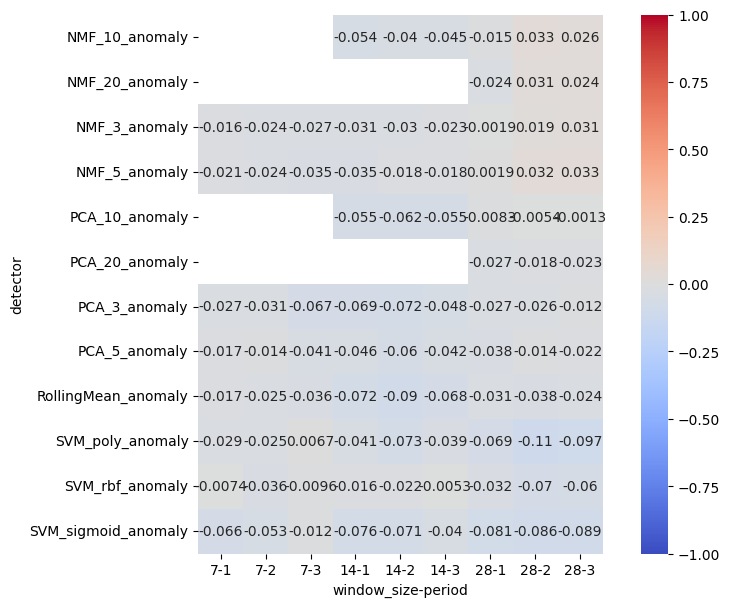

In [168]:
corr_table = corr.sort_values(by='detector').pivot_table(
    index='detector',
    columns=['window_size', 'period'],
    values='rho',
    aggfunc='median'
)
hm_size = (10, 7)
fig, ax = plt.subplots(figsize=hm_size)
sns.heatmap(
    corr_table,
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    annot=True,
    cmap='coolwarm',
    ax=ax
)

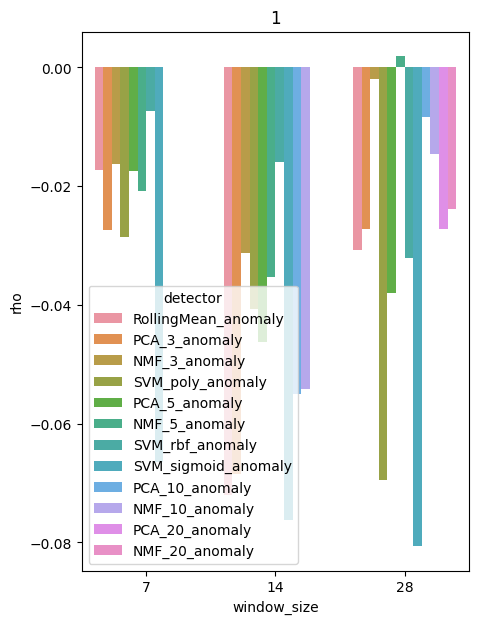

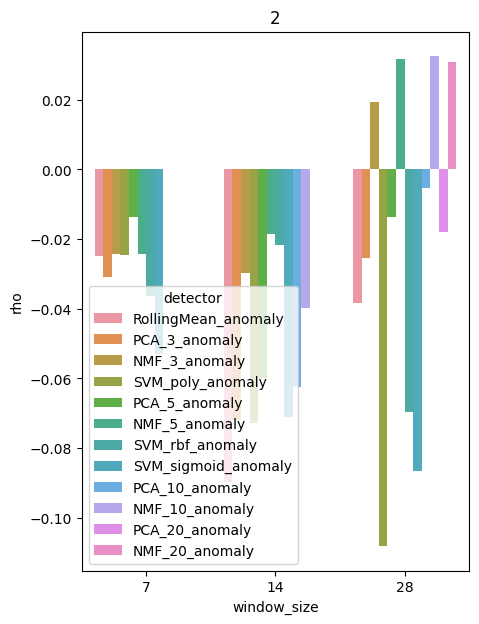

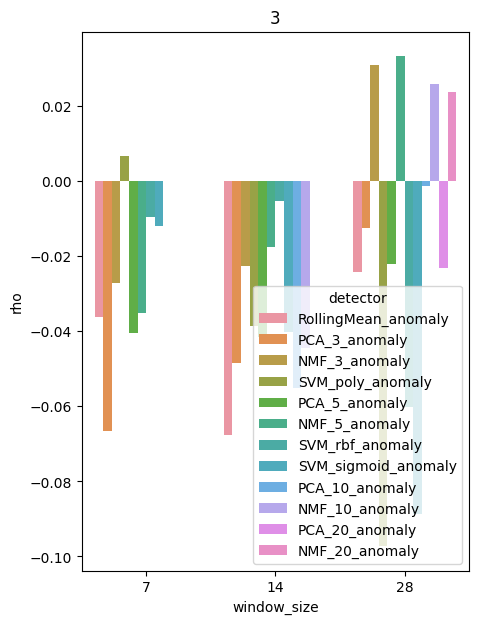

In [169]:
for p, p_df in corr.groupby('period'):
    fig, ax = plt.subplots(figsize=(5,7))
    sns.barplot(
        x='window_size',
        y='rho',
        data=p_df,
        hue='detector',
        ax=ax
    )
    ax.set_title(p)

In [170]:
qc = phq_anomalies[phq_anomalies.days == phq_anomalies.period*7]
qc.shape, phq_anomalies.shape

((9360, 22), (13176, 22))

In [171]:
phq_anomalies.loc[
    phq_anomalies.n_components != 3,
    'SVM_anomaly'
] = np.nan

AttributeError: 'DataFrame' object has no attribute 'n_components'

In [ ]:

corr = phq_anomalies.groupby(
    ['subject_id', 'window_size', 'n_components', 'period']
)[['phq_change', *anomaly_detector_cols]].corr(method='spearman')
c1 = corr["phq_change"].reset_index()
detector_corr = c1[c1.level_4 != 'phq_change'].rename(columns={'level_4': 'detector', 'phq_change': 'corr'})
detector_corr.head(n=20)


/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_46117/1508198112.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr = phq_anomalies.groupby(


,subject_id,window_size,n_components,period,detector,corr
1,INS-W_300,7,3,1,RollingMean_anomaly,0.214286
2,INS-W_300,7,3,1,PCA_anomaly,-0.268926
3,INS-W_300,7,3,1,NMF_anomaly,0.214286
5,INS-W_300,7,3,2,RollingMean_anomaly,0.622752
6,INS-W_300,7,3,2,PCA_anomaly,-0.080064
7,INS-W_300,7,3,2,NMF_anomaly,0.622752
9,INS-W_300,7,3,3,RollingMean_anomaly,0.427793
10,INS-W_300,7,3,3,PCA_anomaly,-0.646762
11,INS-W_300,7,3,3,NMF_anomaly,0.427793
13,INS-W_300,7,5,1,RollingMean_anomaly,0.214286


In [ ]:
detector_corr[
    (detector_corr.detector == 'PCA_anomaly') &
    (detector_corr.period == 1)
].head(n=20)

,subject_id,window_size,n_components,period,detector,corr
2,INS-W_300,7,3,1,PCA_anomaly,-0.268926
14,INS-W_300,7,5,1,PCA_anomaly,-0.268926
26,INS-W_300,14,3,1,PCA_anomaly,-0.472456
38,INS-W_300,14,5,1,PCA_anomaly,-0.472456
50,INS-W_300,14,10,1,PCA_anomaly,-0.472456
62,INS-W_300,28,3,1,PCA_anomaly,-0.425210
74,INS-W_300,28,5,1,PCA_anomaly,-0.425210
86,INS-W_300,28,10,1,PCA_anomaly,-0.425210
98,INS-W_302,7,3,1,PCA_anomaly,-0.359722
110,INS-W_302,7,5,1,PCA_anomaly,-0.359722


In [ ]:
detector_corr.subject_id.unique()

array(['INS-W_300', 'INS-W_338', 'INS-W_372', 'INS-W_373', 'INS-W_410',
       'INS-W_453', 'INS-W_489', 'INS-W_490', 'INS-W_533', 'INS-W_572'],
      dtype=object)

<AxesSubplot: xlabel='phq_change', ylabel='Count'>

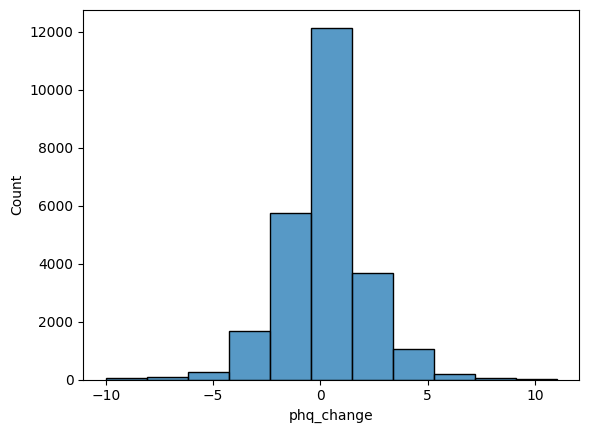

In [ ]:
sns.histplot(qc['phq_change'], bins=11)

In [ ]:
parameter_cols = ['n_components', 'window_size', 'period']
anomaly_detector_cols = [
    d for d in phq_anomalies.columns if d.endswith("_anomaly")
]
phq_anom_melt = qc.melt(
    id_vars=['subject_id', 'start', 'phq_change'] + parameter_cols,
    value_vars=anomaly_detector_cols,
    value_name='anomalies',
    var_name='detector'
).dropna()